## Consumer Credit Worthiness Analysis

**Problem statement:**
Predict the customer loan status

**Problem type:**

Binary classification (supervised learning)

In [659]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [660]:
#Load dataset
df= pd.read_excel("Consumer creditworthiness train data.xlsx")

In [661]:
#Look at the top 5 records of data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


## Exploratory Data Analysis

#### In dataset 13 colums 12 is independent features and 1 is dependent.

| Feature Name: | Description: | 
|---|---|
| Loan_ID | It's a Unique ID |
|Gender | Male or Feamle|
|Married | Marital Status|
|Dependents| Family members|
|Education| Applicant Education|
|Self_Employed| Independent Worker/Business|
|ApplicantIncome | Annual Income|
|CoapplicantIncome | Joint Income|
|LoanAmount | Loan Amount|
|Loan_Amount_Term | Loan Duration in month|
|Credit_History |1 - Good Credit history, 0- Bad Credit History|
|Property_Area | Property Area Type |
| Loan_Status | Approval Status(Y-Yes/N-No) |

In [662]:
# Check the various attributes of data like shape
df.shape

(521, 13)

In [663]:
# column values
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [664]:
# Checking the data frame information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


Here are Dependents column is in object(string) type need to convert in int64 type. Co-Applicant income,Loan amount term and Credit history in Float type need to change in int64 type.
 In Gender, Married, Dependents, Self_employed, Loan Amount Term, Credit History values are missing.

## Data Cleaning &  Missing Value Treatement 

In [665]:
df['Gender'].value_counts() # here is Mode value is Male we fill in missing rows.

Gender
Male      415
Female     96
Name: count, dtype: int64

In [666]:
# Filled missing values
df.Gender.fillna(df['Gender'].mode().iloc[0],inplace=True)

In [667]:
df.Married.value_counts() # Here are 3 rows are missing we use Yes  there.

Married
Yes    335
No     183
Name: count, dtype: int64

In [668]:
df['Married'].fillna('Yes',inplace=True)

In [669]:
df['Dependents'].value_counts()

Dependents
0     299
1      84
2      84
3+     41
Name: count, dtype: int64

In [670]:
# here is + sign use for 3+ dependent so we will remove + sing for better predication.
df['Dependents']=df['Dependents'].replace(r"\+",'',regex=True)

In [671]:
# fill common value in missing rows.
df['Dependents'].fillna(value=0,inplace=True)

In [672]:
# change dtype str to int
df['Dependents']=df['Dependents'].astype('int64')

In [673]:
# 27 Values missing in self_employes.
df['Self_Employed'].isnull().sum()

27

In [674]:
print(df['Self_Employed'].value_counts())
#No count is high we replce No in missing values
df['Self_Employed'].fillna('No',inplace=True)
print(df['Self_Employed'].isnull().sum()) # Right now 0 missing values in Self Employes col.

Self_Employed
No     427
Yes     67
Name: count, dtype: int64
0


In [675]:
print(df['Loan_Amount_Term'].value_counts()) # values counts in loan amt term
# filles missing values median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
print(df['Loan_Amount_Term'].isnull().sum()) # No null value in Loan_Amount_Term column

Loan_Amount_Term
360.0    432
180.0     36
480.0     14
300.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: count, dtype: int64
0


In [676]:
df['Credit_History'].isnull().sum() # 43 values missed in credit_History.

43

In [677]:
df['Credit_History'].value_counts()

Credit_History
1.0    405
0.0     73
Name: count, dtype: int64

In [678]:
# we can use the most frequent value (mode) in the column.
df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0],inplace=True)

In [679]:
#No any missing values in dataset
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [680]:
# Loan_Amount_Term, Credit_History change datatype float to int64
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int64')
df['Credit_History']=df['Credit_History'].astype('int64')

In [681]:
#Visualize dataframe statistics
df.describe()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,521.000000,521.000000,5.210000e+02,5.210000e+02,5.210000e+02,521.000000,521.000000
mean,547517.817658,0.719770,1.229406e+06,3.495994e+05,2.797044e+05,343.715931,0.859885
std,261344.261339,0.999121,1.449755e+06,4.824296e+05,1.712505e+05,62.804305,0.347440
min,101559.000000,0.000000,3.375000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000
25%,314492.000000,0.000000,6.468750e+05,0.000000e+00,1.960000e+05,360.000000,1.000000
50%,543412.000000,0.000000,8.581500e+05,2.812500e+05,2.500000e+05,360.000000,1.000000
75%,783776.000000,1.000000,1.292850e+06,5.179500e+05,3.200000e+05,360.000000,1.000000
max,998791.000000,3.000000,1.822500e+07,4.500000e+06,1.400000e+06,480.000000,1.000000


In [682]:
df_loan_status_values= df['Loan_Status'].value_counts(normalize=True)
df_loan_status_values

Loan_Status
Y    0.68714
N    0.31286
Name: proportion, dtype: float64

One of the first things that we notice is that the dataset is unbalanced. Target Yes shares are relatively 69% for class and 31% for No.

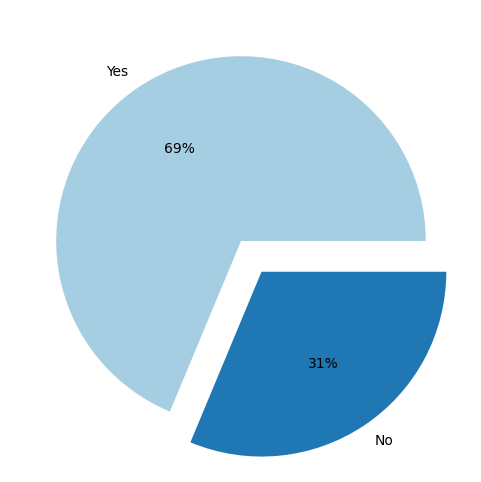

In [683]:
# Target feature balance
plt.figure(figsize=(15,6))

# define color palette
colors= sns.color_palette('Paired')

#define Labels
labels= ['Yes','No']
explode= [0,0.2]

plt.pie(df_loan_status_values, explode=explode, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

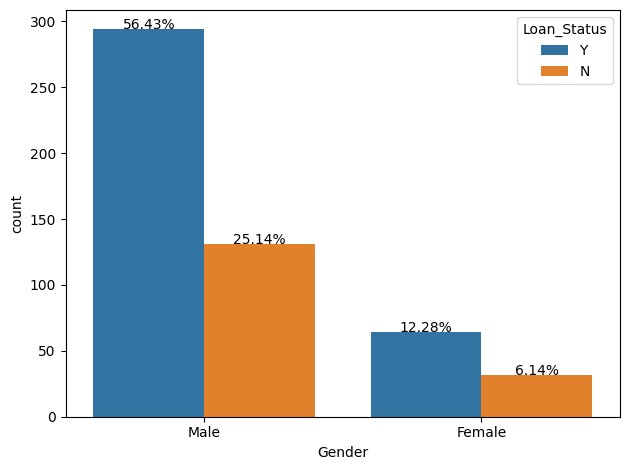

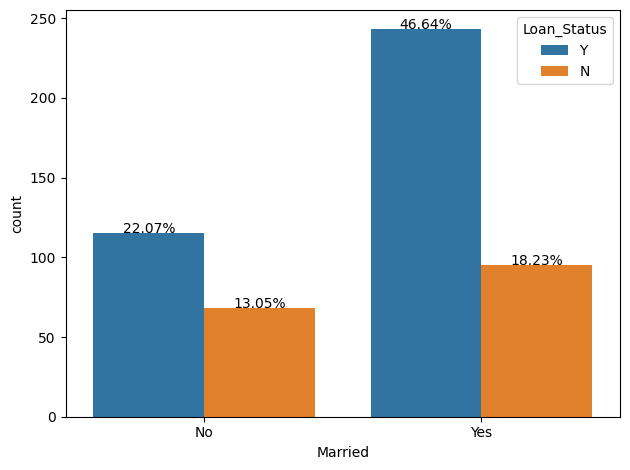

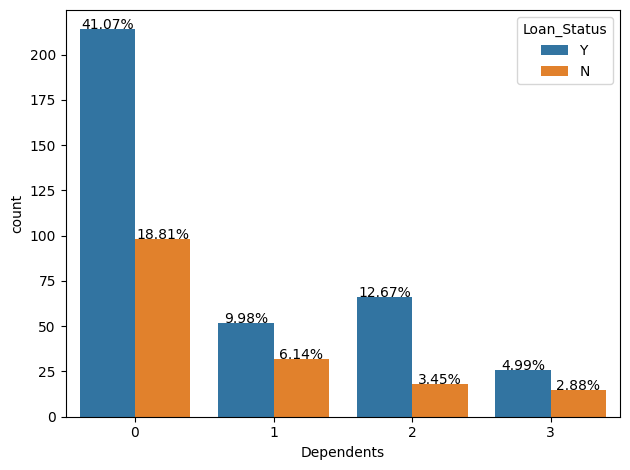

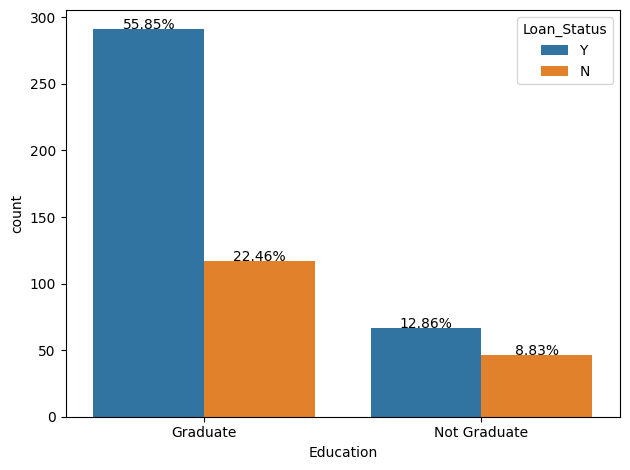

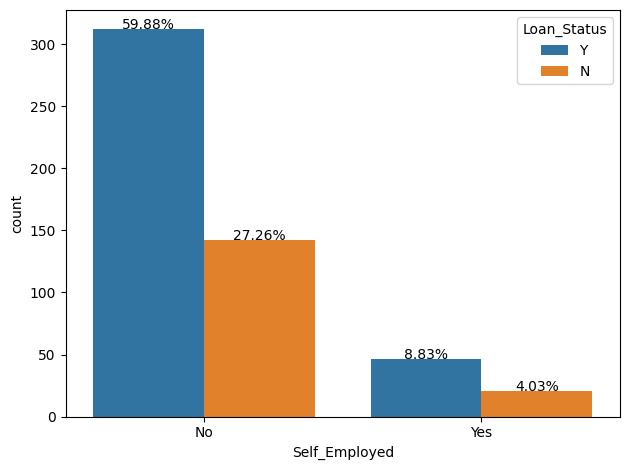

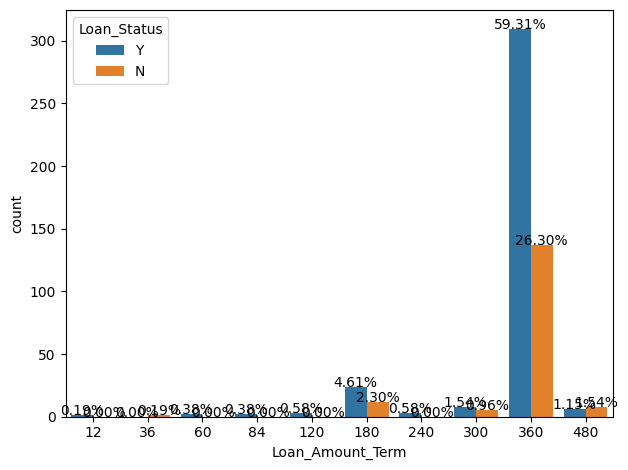

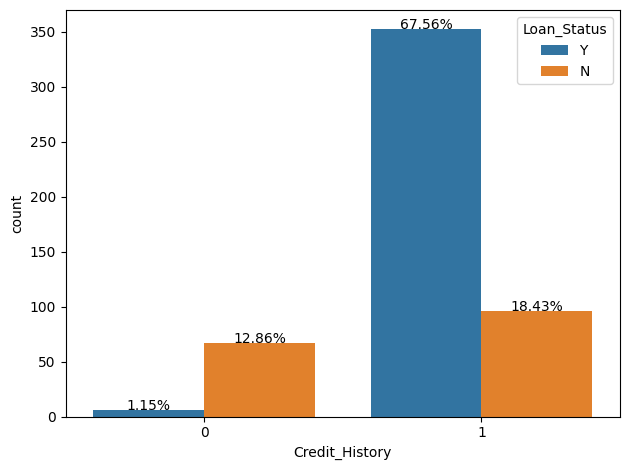

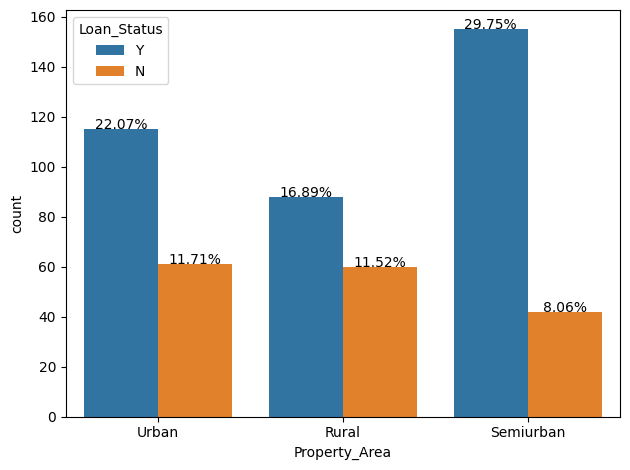

In [684]:
# Iterate through the predictors
for i, predictor in enumerate(df.drop(columns=['Loan_Status','Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount'])):
    plt.figure(i)
    ax = sns.countplot(data=df, x=predictor, hue='Loan_Status')
    
    # Calculate percentages
    total = len(df[predictor])
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center')
    
    plt.tight_layout()

plt.show()

In [685]:
# Convert targer veriable into binary format.
df['Loan_Status'] = np.where(df.Loan_Status == 'Y',1,0)

In [686]:
# Remove Loan_ID columns from dataset it's not required.
df.drop(columns=['Loan_ID'],inplace=True)

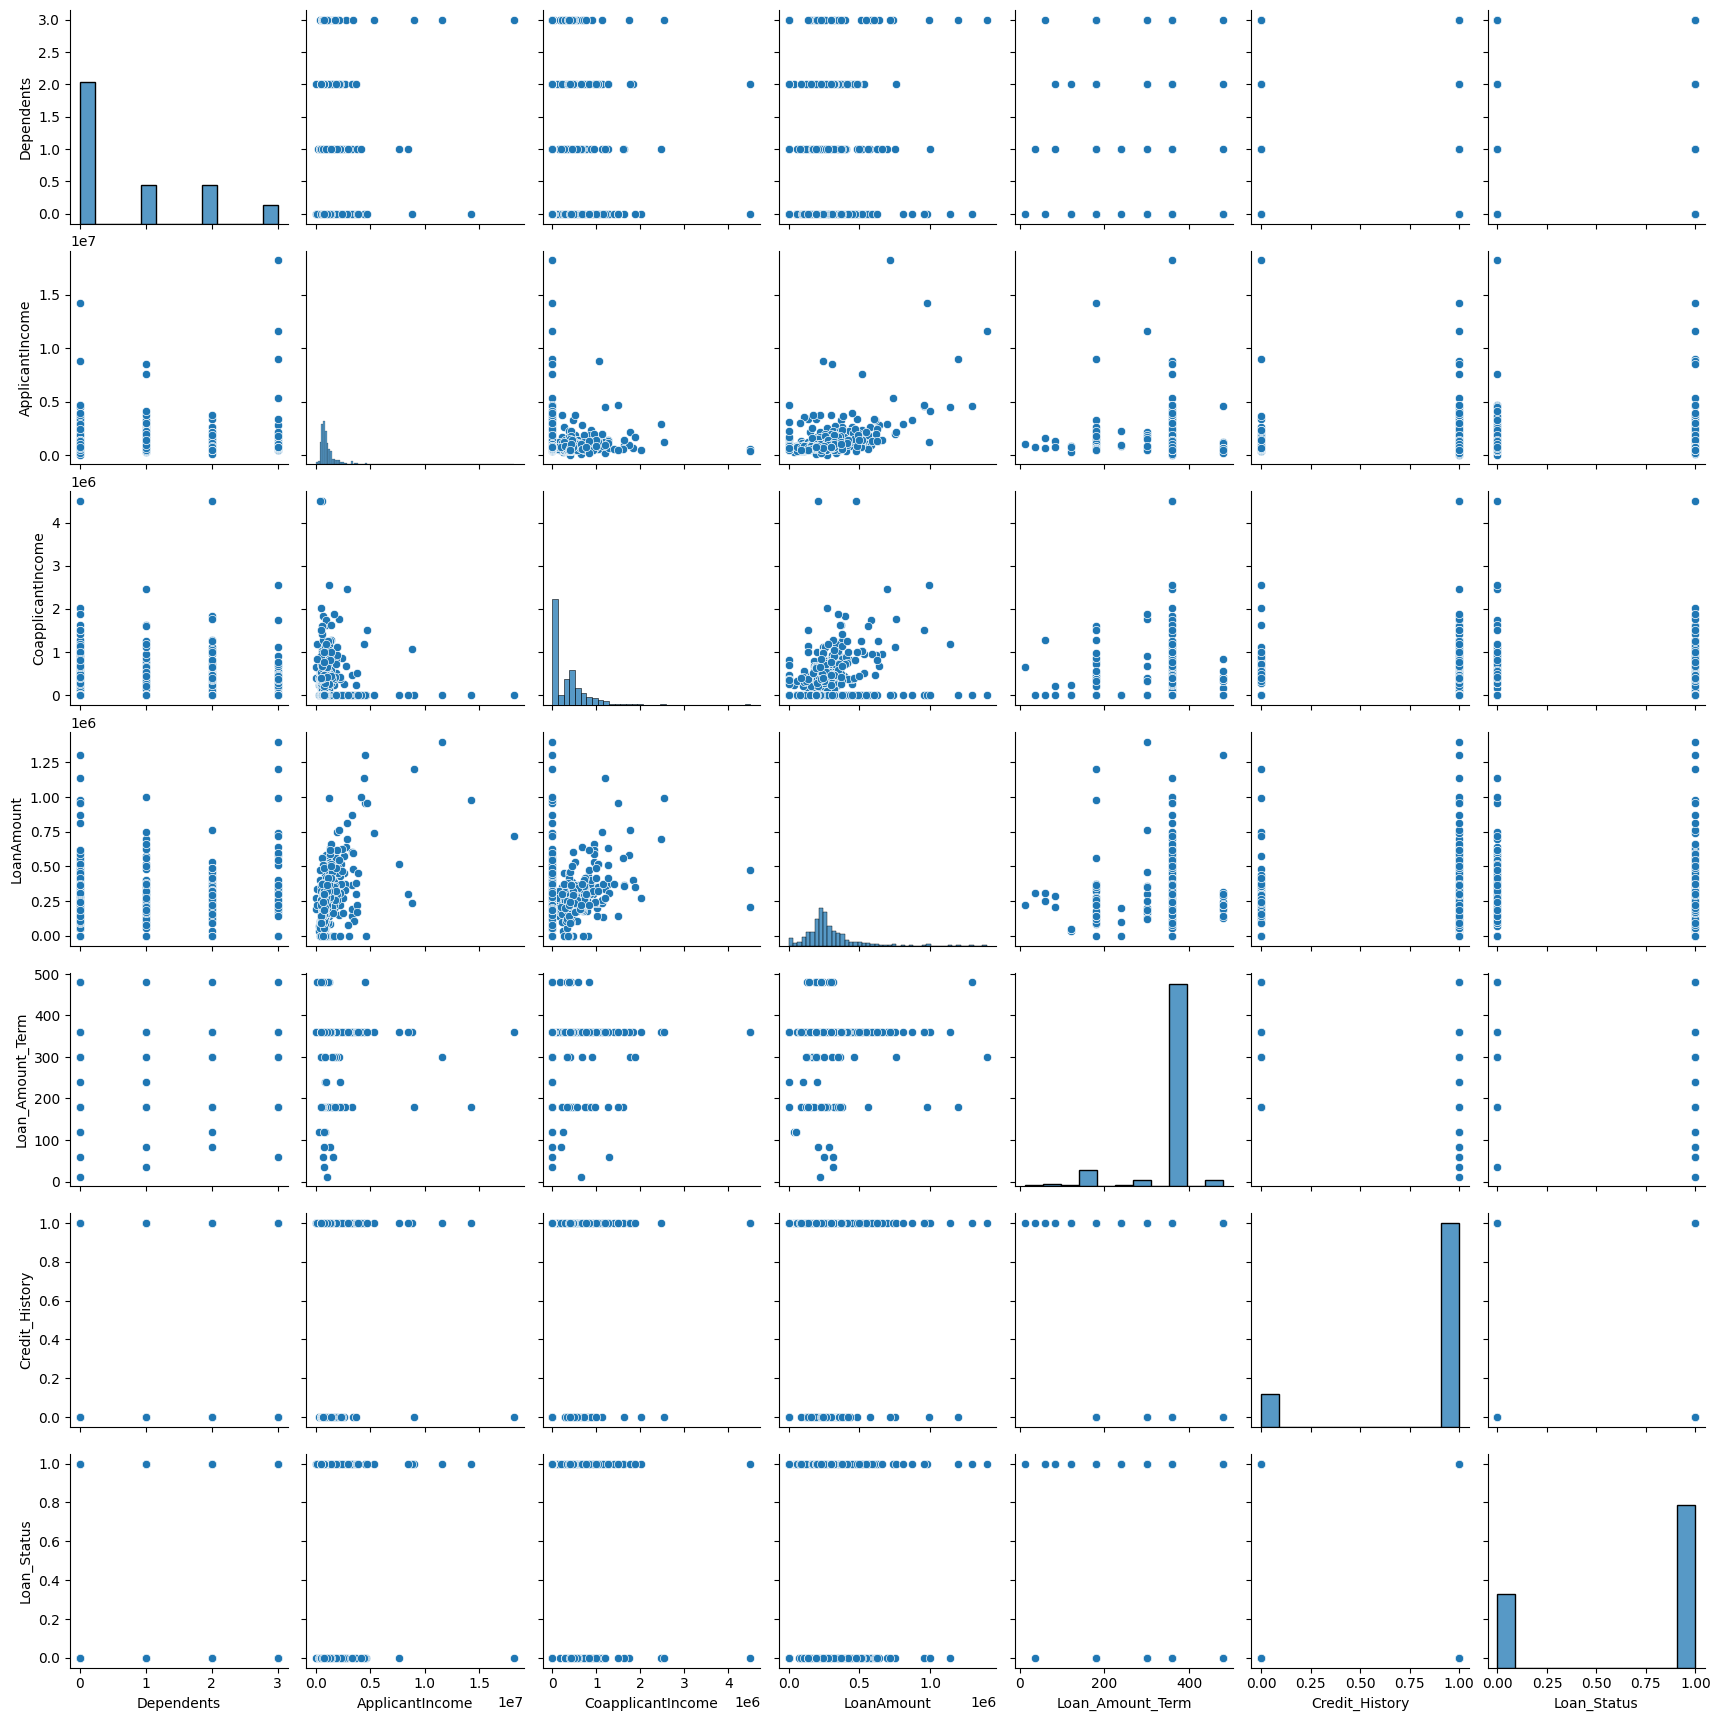

In [687]:
sns.pairplot(df, kind='scatter')
plt.show()

In [688]:
# Applicant & co-Applicant income is increase and loan amount is incresed there is showing possitive relationship.

In [689]:
from scipy.stats import chi2_contingency
categorical_columns = ['Gender', 'Married', 'Education', 'Credit_History', 'Property_Area']
target_column = 'Loan_Status'
alpha=0.05
for cat_column in categorical_columns:
    contingency_table = pd.crosstab(df[cat_column], df[target_column])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test results for {cat_column} vs. {target_column}:")
    print("Chi-square statistic:", chi2)
    print("P-value:", p_value)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:")
    print(expected)
    
    if p_value<=alpha:
        print(f"Reject H0, There is relationship {cat_column} and {target_column}.")
    else:
        print(f"Retain H0, There is no relationship {cat_column} and {target_column}.")
    print("\n")
    

Chi-square test results for Gender vs. Loan_Status:
Chi-square statistic: 0.1275630844778018
P-value: 0.7209722188182978
Degrees of freedom: 1
Expected frequencies:
[[ 30.03454894  65.96545106]
 [132.96545106 292.03454894]]
Retain H0, There is no relationship Gender and Loan_Status.


Chi-square test results for Married vs. Loan_Status:
Chi-square statistic: 4.113749062816959
P-value: 0.04253597141075403
Degrees of freedom: 1
Expected frequencies:
[[ 57.25335893 125.74664107]
 [105.74664107 232.25335893]]
Reject H0, There is relationship Married and Loan_Status.


Chi-square test results for Education vs. Loan_Status:
Chi-square statistic: 5.412089360791851
P-value: 0.019997766888094164
Degrees of freedom: 1
Expected frequencies:
[[127.64683301 280.35316699]
 [ 35.35316699  77.64683301]]
Reject H0, There is relationship Education and Loan_Status.


Chi-square test results for Credit_History vs. Loan_Status:
Chi-square statistic: 141.2646720347058
P-value: 1.4082111161728345e-32
Degrees

#### As per chi_square test relationshion found Married,Education,Credit_History,Property_Area with Laon_status.so this features is important for model building.

In [690]:
# plt.figure(figsize=(12,8))
# sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
# plt.show()
# # This is also evidence from the Heatmap below. # num vs num

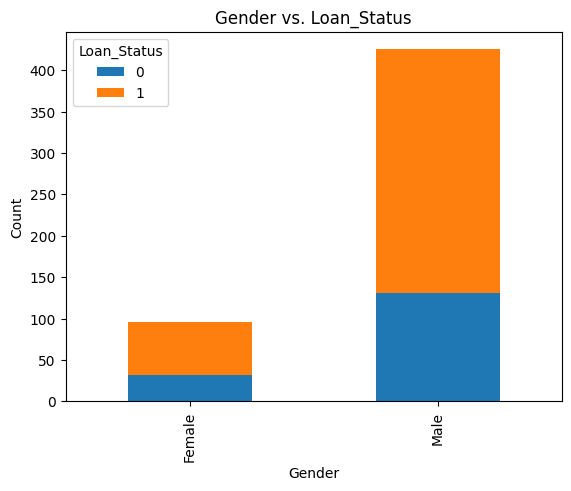

In [691]:
gender_loan_status = df.groupby(['Gender', 'Loan_Status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True)
plt.title('Gender vs. Loan_Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# In this graph maximum male applicant apply for loan also male approve chances is high compare then female.

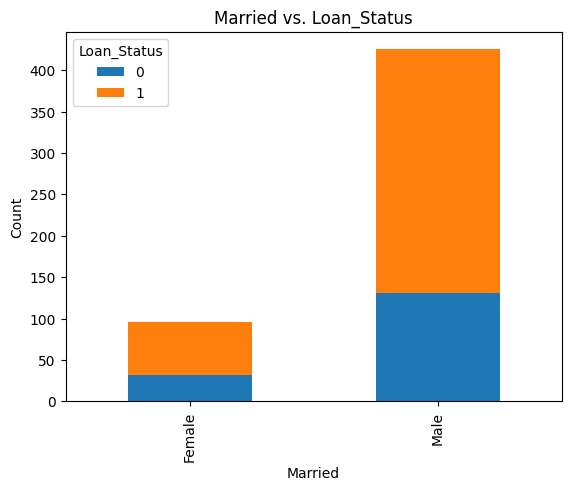

In [692]:
Married_loan_status = df.groupby(['Married', 'Loan_Status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True)
plt.title('Married vs. Loan_Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

# As per graph most of married people are apply for loan also possibilites of laan approved is also good compare then no married.

In [693]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

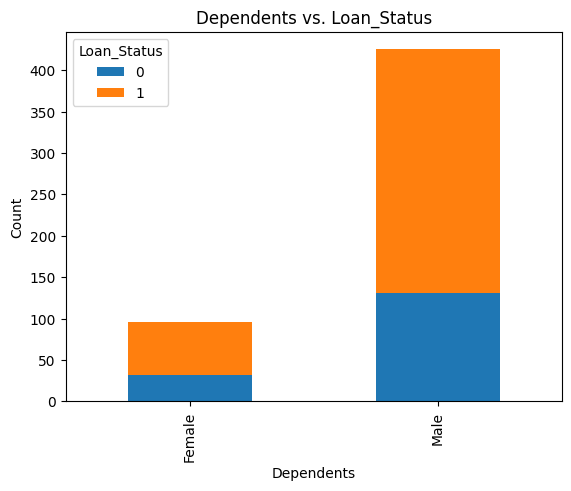

Loan_Status,0,1
Dependents,,
0,98,214
1,32,52
2,18,66
3,15,26


In [694]:
Dependents_loan_status = df.groupby(['Dependents', 'Loan_Status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True)
plt.title('Dependents vs. Loan_Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()
Dependents_loan_status

# If dependent count is incresed still no changes in loan approve status.

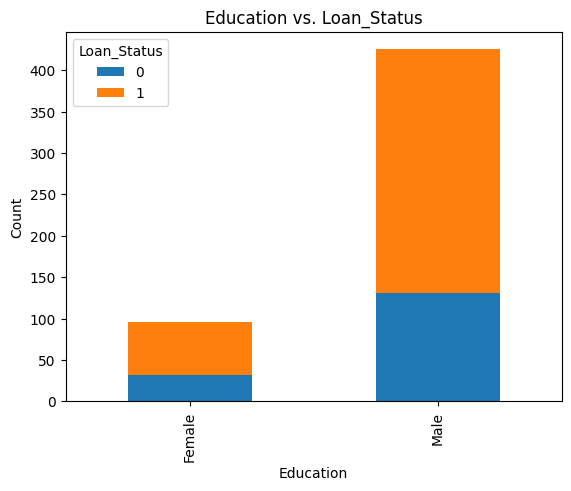

Loan_Status,0,1
Education,,
Graduate,117,291
Not Graduate,46,67


In [695]:
Education_loan_status = df.groupby(['Education', 'Loan_Status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True)
plt.title('Education vs. Loan_Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()
Education_loan_status

# If applicant is not Graduate loan approve persantage is good compare then Graduate applicant.

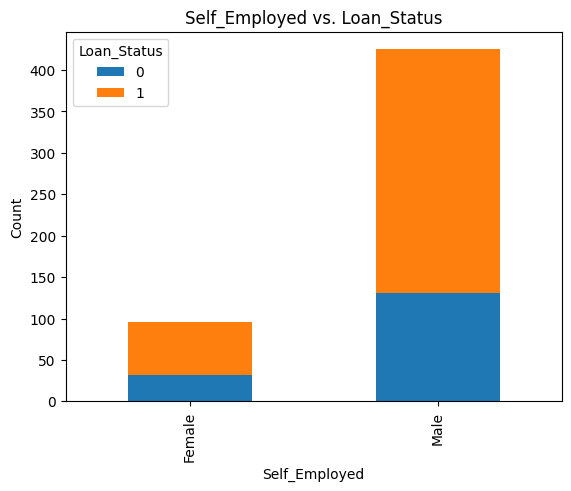

Loan_Status,0,1
Self_Employed,,
No,142,312
Yes,21,46


In [696]:
Self_Employed_loan_status = df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True)
plt.title('Self_Employed vs. Loan_Status')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.show()
Self_Employed_loan_status

# Only 67 self employed in dataset and almost 31% case are rejected 69% is approved.

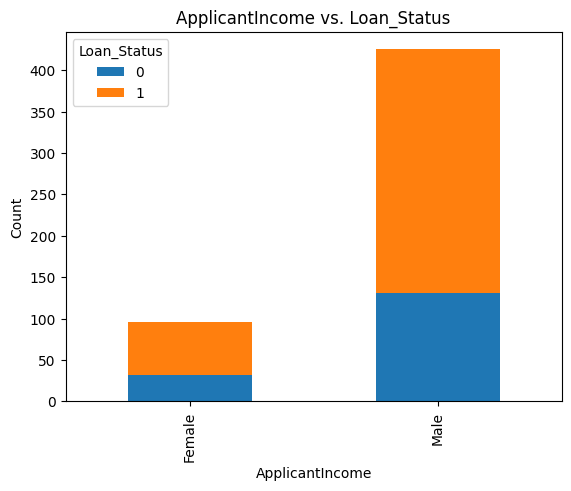

Loan_Status,0,1
ApplicantIncome,,
33750,1.0,NaN
47250,NaN,1.0
145125,NaN,1.0
151650,NaN,1.0
225000,1.0,NaN
...,...,...
8808075,NaN,1.0
8999775,NaN,1.0
11646675,NaN,1.0


In [697]:
ApplicantIncome_loan_status = df.groupby(['ApplicantIncome', 'Loan_Status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True)
plt.title('ApplicantIncome vs. Loan_Status')
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.show()
ApplicantIncome_loan_status

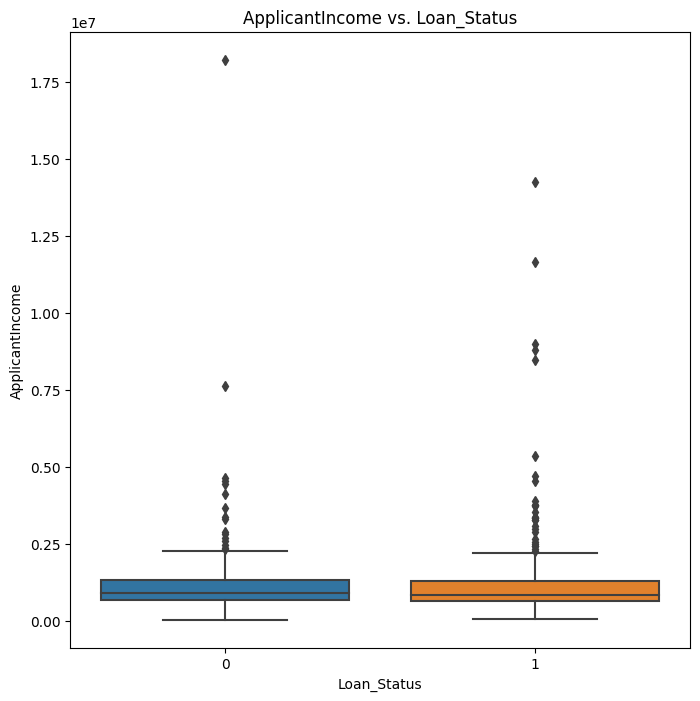

In [698]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('ApplicantIncome vs. Loan_Status')
plt.show()

# In Income column some outliers is present we need to use some methos

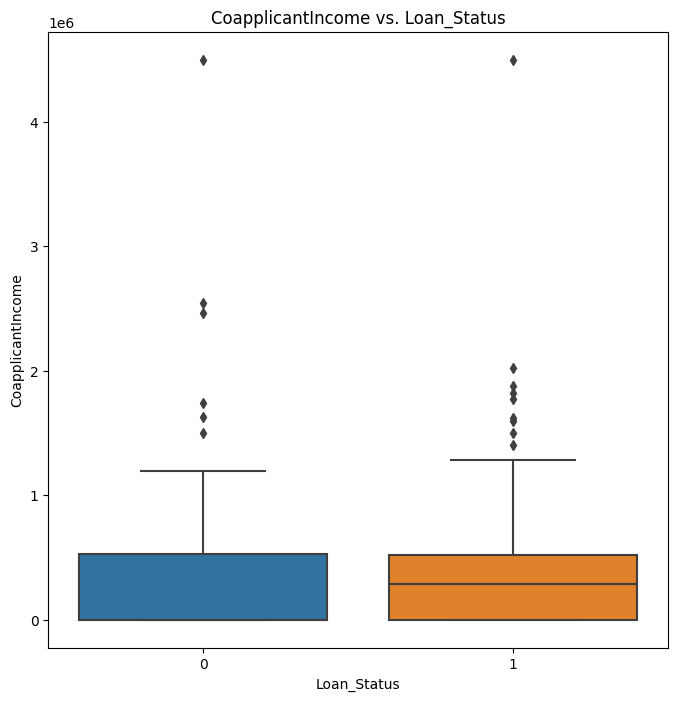

In [699]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('CoapplicantIncome vs. Loan_Status')
plt.show()
# here is also outliers present but count is less.

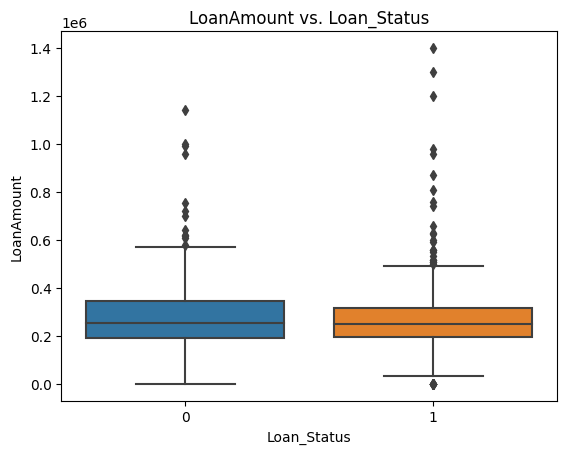

In [700]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('LoanAmount vs. Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.show()
# outlier present in Loanamount.

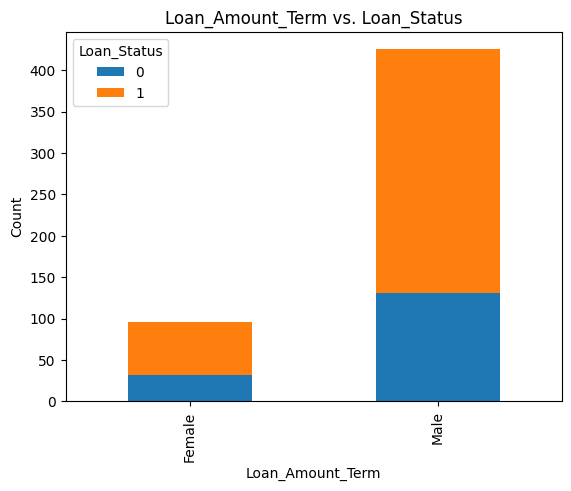

Loan_Status,0,1
Loan_Amount_Term,,
12,NaN,1.0
36,1.0,NaN
60,NaN,2.0
84,NaN,2.0
120,NaN,3.0
180,12.0,24.0
240,NaN,3.0
300,5.0,8.0
360,137.0,309.0


In [701]:
Loan_Amount_Term_loan_status = df.groupby(['Loan_Amount_Term', 'Loan_Status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True)
plt.title('Loan_Amount_Term vs. Loan_Status')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')
plt.show()
Loan_Amount_Term_loan_status

# If Tenure is 30year loan approve chance is high.

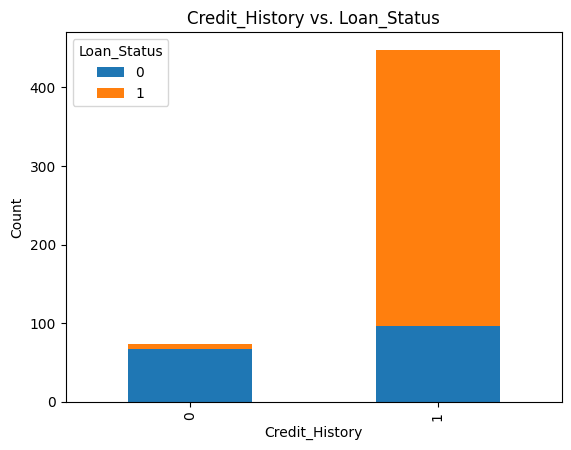

Loan_Status,0,1
Credit_History,,
0,67,6
1,96,352


In [702]:
credit_history_loan_status = df.groupby(['Credit_History', 'Loan_Status']).size().unstack()
credit_history_loan_status.plot(kind='bar', stacked=True)
plt.title('Credit_History vs. Loan_Status')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.show()
credit_history_loan_status

# Good credit history loan approve status is high.

#### Model preprocessing and Feature engineering stage 

In [703]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360,1,Urban,1
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360,1,Rural,0
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360,1,Urban,1
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360,1,Urban,1
4,Male,No,0,Graduate,No,1350000,0.0,282000,360,1,Urban,1


In [704]:
# We create new feature Total Income for better understand.
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [705]:
# Convert Loan_Term into short medium and long.
df['Loan_Amount_category'] = pd.cut(x= df['Loan_Amount_Term'], bins= [0,120,240, float ('inf')],labels=['Short','Medium','Long'])

In [706]:
df= pd.get_dummies(df, columns=['Property_Area'], prefix=['Property'],dtype='int64')

In [707]:
# New Feature debt income ratio 
df['Debt_Income_Ratio'] = df['LoanAmount'] / df['TotalIncome'] * 100

In [708]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Loan_Amount_category,Property_Rural,Property_Semiurban,Property_Urban,Debt_Income_Ratio
0,Male,No,0,Graduate,No,1316025,0.0,250000,360,1,1,1316025.0,Long,0,0,1,18.996600
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360,1,0,1370475.0,Long,1,0,0,18.679655
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360,1,1,675000.0,Long,0,0,1,19.555556
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360,1,1,1111725.0,Long,0,0,1,21.588073
4,Male,No,0,Graduate,No,1350000,0.0,282000,360,1,1,1350000.0,Long,0,0,1,20.888889


In [709]:
# OneHot encoding with categorical features.
df= pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Loan_Amount_category'],dtype='int64')

In [710]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Rural,Property_Semiurban,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_category_Short,Loan_Amount_category_Medium,Loan_Amount_category_Long
0,0,1316025,0.0,250000,360,1,1,1316025.0,0,0,...,1,1,0,1,0,1,0,0,0,1
1,1,1031175,339300.0,256000,360,1,0,1370475.0,1,0,...,1,0,1,1,0,1,0,0,0,1
2,0,675000,0.0,132000,360,1,1,675000.0,0,0,...,1,0,1,1,0,0,1,0,0,1
3,0,581175,530550.0,240000,360,1,1,1111725.0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,0,1350000,0.0,282000,360,1,1,1350000.0,0,0,...,1,1,0,1,0,1,0,0,0,1


In [711]:
df.drop(columns= ['ApplicantIncome','CoapplicantIncome','Gender_Female','Married_No','Self_Employed_No','Loan_Amount_Term','Loan_Amount_category_Short',
                  'Education_Graduate','Property_Rural'],
        inplace=True)

In [712]:
df.shape

(521, 14)

In [713]:
import statsmodels.api as sm
from scipy import stats

In [714]:
# Seprate dataset into train and test
X= df.drop(columns=['Loan_Status'],axis=1)
y= df['Loan_Status']

In [715]:
# save columns in one list
columns= list(X.columns)

In [716]:
df_dataframe_feature= pd.DataFrame(X, columns=columns)

In [717]:
df_dataframe_feature.head()

,Dependents,LoanAmount,Credit_History,TotalIncome,Property_Semiurban,Property_Urban,Debt_Income_Ratio,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_category_Medium,Loan_Amount_category_Long
0,0,250000,1,1316025.0,0,1,18.996600,1,0,0,0,0,1
1,1,256000,1,1370475.0,0,0,18.679655,1,1,0,0,0,1
2,0,132000,1,675000.0,0,1,19.555556,1,1,0,1,0,1
3,0,240000,1,1111725.0,0,1,21.588073,1,1,1,0,0,1
4,0,282000,1,1350000.0,0,1,20.888889,1,0,0,0,0,1


In [718]:
# Library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def calculate_vif(dataset):
    Indep_var= X
    const = add_constant(Indep_var)
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_value'] = [variance_inflation_factor(dataset.values, i) for i in range (dataset.shape[1])]
    
    return (vif)

In [719]:
features= df.drop(columns= ['Loan_Status'])
calculate_vif(features)

,features,VIF_value
0,Dependents,1.776255
1,LoanAmount,9.738952
2,Credit_History,6.605459
3,TotalIncome,5.724052
4,Property_Semiurban,2.297444
5,Property_Urban,2.157096
6,Debt_Income_Ratio,12.499288
7,Gender_Male,6.376803
8,Married_Yes,3.692464
9,Education_Not Graduate,1.390747


***The features "LoanAmount," "Credit_History," "TotalIncome,", "Loan_Amount_category_Long","Gender_Male"  show moderate to relatively high VIF values,indicating some degree of correlation among them.Debt_Income_Ratio i was create is there is showing high VIF value will drop this feature.***

In [720]:
df.drop(columns=['Debt_Income_Ratio'],inplace=True)

In [721]:
df.head()

,Dependents,LoanAmount,Credit_History,Loan_Status,TotalIncome,Property_Semiurban,Property_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_category_Medium,Loan_Amount_category_Long
0,0,250000,1,1,1316025.0,0,1,1,0,0,0,0,1
1,1,256000,1,0,1370475.0,0,0,1,1,0,0,0,1
2,0,132000,1,1,675000.0,0,1,1,1,0,1,0,1
3,0,240000,1,1,1111725.0,0,1,1,1,1,0,0,1
4,0,282000,1,1,1350000.0,0,1,1,0,0,0,0,1


In [722]:
#Outlier Imputation
Out_columns= df[['LoanAmount','TotalIncome']]

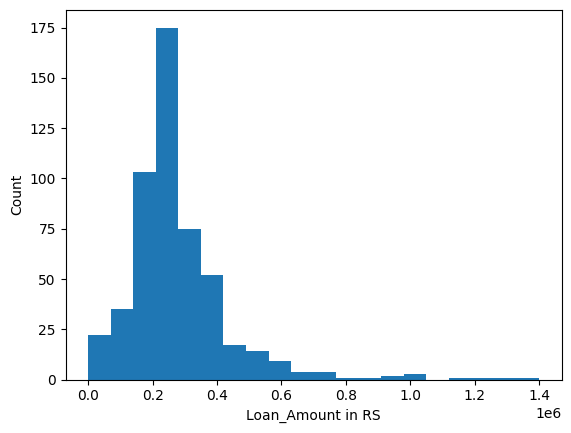

In [723]:
plt.hist(df['LoanAmount'],bins=20)
plt.xlabel("Loan_Amount in RS")
plt.ylabel("Count")
plt.show()

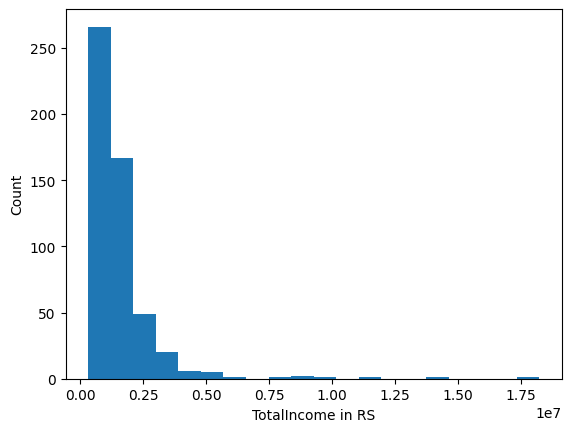

In [724]:
plt.hist(df['TotalIncome'],bins=20)
plt.xlabel("TotalIncome in RS")
plt.ylabel("Count")
plt.show()

#### In both graph, distribution is right skew distribution.

In [725]:
df['Z_Score'] = df[['LoanAmount']].apply(stats.zscore)
df['Outlier'] = (abs(df['Z_Score'])>=1.5)
print((df['Z_Score']== True).sum())
#If the absolute value of the z-score is less than 1.5, we consider the data point as not an outlier.

0


In [726]:
df['Z_Score_Income'] = df[['TotalIncome']].apply(stats.zscore)
df['Outlier_income'] = (abs(df['Z_Score_Income'])>=1.5)
print((df['Z_Score_Income'] == True).sum())
#If the absolute value of the z-score is less than 1.5, we consider the data point as not an outlier.

0


In [727]:
df.head()

,Dependents,LoanAmount,Credit_History,Loan_Status,TotalIncome,Property_Semiurban,Property_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_category_Medium,Loan_Amount_category_Long,Z_Score,Outlier,Z_Score_Income,Outlier_income
0,0,250000,1,1,1316025.0,0,1,1,0,0,0,0,1,-0.173623,False,-0.178464,False
1,1,256000,1,0,1370475.0,0,0,1,1,0,0,0,1,-0.138553,False,-0.141513,False
2,0,132000,1,1,675000.0,0,1,1,1,0,1,0,1,-0.863334,False,-0.613476,False
3,0,240000,1,1,1111725.0,0,1,1,1,1,0,0,1,-0.232073,False,-0.317106,False
4,0,282000,1,1,1350000.0,0,1,1,0,0,0,0,1,0.013418,False,-0.155408,False


In [728]:
df.drop(columns=['Z_Score','Outlier','Z_Score_Income','Outlier_income'],inplace=True) # extra column create for cheking outlier and droped that column.

In [729]:
df.head()

,Dependents,LoanAmount,Credit_History,Loan_Status,TotalIncome,Property_Semiurban,Property_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_category_Medium,Loan_Amount_category_Long
0,0,250000,1,1,1316025.0,0,1,1,0,0,0,0,1
1,1,256000,1,0,1370475.0,0,0,1,1,0,0,0,1
2,0,132000,1,1,675000.0,0,1,1,1,0,1,0,1
3,0,240000,1,1,1111725.0,0,1,1,1,1,0,0,1
4,0,282000,1,1,1350000.0,0,1,1,0,0,0,0,1


## SMOTE
* In our data set we have Imbalanced Data Distribution in our dependent variable, it generally happens when observations in one of the class are much higher.

* Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.



* SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [730]:
#import the module 

from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.drop(columns=['Loan_Status']), df['Loan_Status'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 521
Resampled dataset shape 716


In [731]:
columns= list(df.columns)

In [732]:
New_df= pd.DataFrame(x_smote, columns=columns)

In [733]:
New_df.Loan_Status = y_smote

In [734]:
New_df

,Dependents,LoanAmount,Credit_History,Loan_Status,TotalIncome,Property_Semiurban,Property_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_category_Medium,Loan_Amount_category_Long
0,0,250000,1,1,1.316025e+06,0,1,1,0,0,0,0,1
1,1,256000,1,0,1.370475e+06,0,0,1,1,0,0,0,1
2,0,132000,1,1,6.750000e+05,0,1,1,1,0,1,0,1
3,0,240000,1,1,1.111725e+06,0,1,1,1,1,0,0,1
4,0,282000,1,1,1.350000e+06,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,0,216128,0,0,1.450673e+06,0,0,1,0,0,0,0,1
712,0,254905,0,0,1.248614e+06,0,0,0,1,0,0,0,1
713,0,337674,1,0,1.292802e+06,0,0,1,1,0,0,0,1
714,0,197533,0,0,8.453155e+05,0,1,1,0,0,0,0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

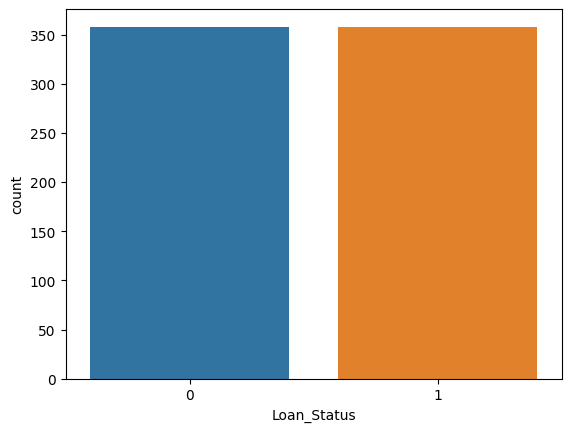

In [735]:
#plot the count plot after smote
sns.countplot(x="Loan_Status",data= New_df)

In [736]:
New_df.head()

,Dependents,LoanAmount,Credit_History,Loan_Status,TotalIncome,Property_Semiurban,Property_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_category_Medium,Loan_Amount_category_Long
0,0,250000,1,1,1316025.0,0,1,1,0,0,0,0,1
1,1,256000,1,0,1370475.0,0,0,1,1,0,0,0,1
2,0,132000,1,1,675000.0,0,1,1,1,0,1,0,1
3,0,240000,1,1,1111725.0,0,1,1,1,1,0,0,1
4,0,282000,1,1,1350000.0,0,1,1,0,0,0,0,1


In [737]:
New_df.shape

(716, 13)

In [738]:
# Make copy
Copy_New_df = New_df.copy()

### **Models**

Following models have been used for predictions:-

* Logistic Regression Classifier
* Support Vector Machine(SVM Classifier)
* XGB Classifier
* Random Forest Classifier

### Implementing Logistic Regression

In [739]:
df_Logistics= Copy_New_df

In [740]:
df_Logistics.head()

,Dependents,LoanAmount,Credit_History,Loan_Status,TotalIncome,Property_Semiurban,Property_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_category_Medium,Loan_Amount_category_Long
0,0,250000,1,1,1316025.0,0,1,1,0,0,0,0,1
1,1,256000,1,0,1370475.0,0,0,1,1,0,0,0,1
2,0,132000,1,1,675000.0,0,1,1,1,0,1,0,1
3,0,240000,1,1,1111725.0,0,1,1,1,1,0,0,1
4,0,282000,1,1,1350000.0,0,1,1,0,0,0,0,1


### train test split dataset

In [741]:
#define the X and y value
X= df_Logistics.drop(columns=['Loan_Status'])
y=df_Logistics.Loan_Status

In [742]:
#standardise the x value by using satandardscaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [743]:
# Split dataset
from sklearn.model_selection import train_test_split

In [744]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=51)

In [745]:
print("shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

shape of X_train (572, 12)
Shape of y_train (572,)
Shape of X_test (144, 12)
Shape of y_test (144,)


In [746]:
from sklearn.linear_model import LogisticRegression

In [747]:
#  Creating model object for logistic regression.
clf= LogisticRegression()

# Fit the model
clf.fit(X_train,y_train)

LogisticRegression()

In [748]:
clf.score(X_test,y_test)

0.7777777777777778

### Logistic regression with GridesearchCV

In [749]:
from sklearn.model_selection import GridSearchCV

In [750]:
# Set the parameter
parameter_gride = {'penalty': ['l1','l2'], 'C': [0.001, 0.01 , 0.1,1,10,1000]}

In [751]:
# fit the parameter
gride_lr_clf= GridSearchCV(LogisticRegression(),param_grid= parameter_gride, scoring='accuracy', n_jobs=-1, verbose=3,cv=3)
gride_lr_clf.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [752]:
GridSearchCV(cv=3,estimator= LogisticRegression(), n_jobs= -1,param_grid= {'C': [0.001, 0.01 , 0.1,1,10,1000], 'penalty': ['l1','l2']},
             scoring= 'accuracy', verbose=3)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [753]:
optimized_clf= gride_lr_clf.best_estimator_
optimized_clf

LogisticRegression(C=0.1)

In [754]:
gride_lr_clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [755]:
gride_lr_clf.best_score_

0.8076880683383852

In [756]:
# Predicted Probability
train_preds= optimized_clf.predict_log_proba(X_train)[:,1]
test_preds= optimized_clf.predict_log_proba(X_test)[:,1]

In [757]:
# Get predicted classes
train_class_pred= optimized_clf.predict(X_train)
test_clas_pred = optimized_clf.predict(X_test)

**Model Evaluation** 

In [758]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score, roc_auc_score

In [759]:
# Get the accuracy score
train_accuracy_lr = accuracy_score(train_class_pred,y_train)
test_accuracy_lr= accuracy_score(test_clas_pred,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.8111888111888111
The accuracy on test data is  0.7847222222222222


In [760]:
test_accuracy_lr= accuracy_score(test_clas_pred,y_test)
test_precision_score_lr = precision_score(test_clas_pred,y_test)
test_f1_score_lr = f1_score(test_clas_pred,y_test)
test_recall_lr = recall_score(test_clas_pred,y_test)
test_roc_score_lr = roc_auc_score(test_clas_pred,y_test)

print("The accuracy on train data is",test_accuracy_lr)
print("The precision on train data is",test_precision_score_lr)
print("The f1 score on train data is",test_f1_score_lr)
print("The recall score on train data is",test_recall_lr)
print("The roc score on train data is", test_roc_score_lr)

The accuracy on train data is 0.7847222222222222
The precision on train data is 0.8452380952380952
The f1 score on train data is 0.8208092485549132
The recall score on train data is 0.797752808988764
The roc score on train data is 0.7806945863125638


In [761]:
# We have implemented logistic regression and we getting f1-sore approx 81% and accuracy is 79% it is better parameter.
#Let's go ahead with other models and see if they can yield better result.

**Confusion Matrix**

Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

In [762]:
from sklearn.metrics import confusion_matrix

In [763]:
# Get confusion matrix from both train and test
cm_lr = confusion_matrix(y_train,train_class_pred)
print(cm_lr)

[[224  74]
 [ 34 240]]


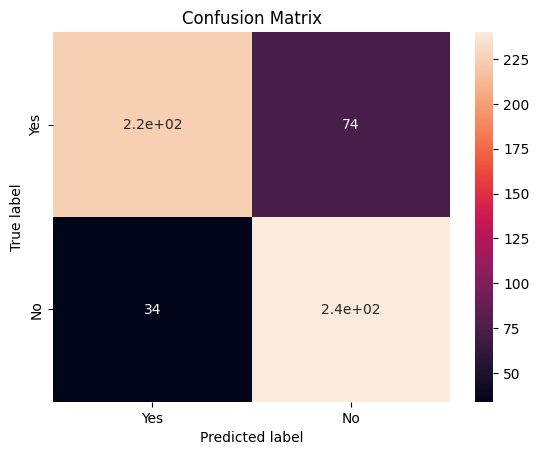

In [764]:
label= ['Yes','No']
ax= plt.subplot()
sns.heatmap(cm_lr, annot= True ,ax=ax)

# label, title and ticks
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

**ROC AUC curve**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate

False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve

In [765]:
from sklearn.metrics import roc_curve

In [766]:
y_pred_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

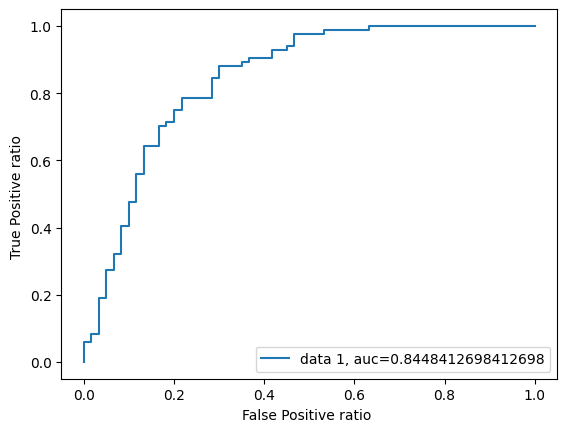

In [767]:
# Plot the graph

y_pred_proba= y_pred_proba_lr
fpr ,tpr ,threshold = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive ratio ")
plt.ylabel("True Positive ratio ")
plt.legend(loc=4)
plt.show()

## Implementing RandomForest

In [768]:
# import the package
from sklearn.ensemble import RandomForestClassifier

In [769]:
# define X and y values
X= Copy_New_df.drop(columns=['Loan_Status'])
y= Copy_New_df.Loan_Status

In [770]:
#standardise the x value by using satandardscaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [771]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=51)

In [772]:
print("shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

shape of X_train (572, 12)
Shape of y_train (572,)
Shape of X_test (144, 12)
Shape of y_test (144,)


In [773]:
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [774]:
# get the predicted classes
train_class_pre = rfc.predict(X_train)
test_class_pre = rfc.predict(X_test)

**Model Evaluation**

In [775]:
# Get the accuracy scores
train_accuracy_rfc = accuracy_score(train_class_pre,y_train)
test_accuracy_rfc = accuracy_score(test_class_pre,y_test)

print("The Accuracy of train data: ",train_accuracy_rfc)
print("The Accuracy of test data:",test_accuracy_rfc)

The Accuracy of train data:  1.0
The Accuracy of test data: 0.7638888888888888


In [776]:
test_accuracy_rfc = accuracy_score(test_class_pre,y_test)
test_precision_score_rfc = precision_score(test_class_pre,y_test)
test_recall_score_rfc= recall_score(test_class_pre,y_test)
test_f1_score_rfc= f1_score(test_class_pre,y_test)
test_roc_score_rfc= roc_auc_score(test_class_pre,y_test)

print("The Accuracy on test data is: ",test_accuracy_rfc)
print("The Precision score is : ",test_precision_score_rfc)
print("The recall score is: ", test_recall_score_rfc)
print("The F1 score is: ",test_f1_score_rfc)
print("AUC and ROC score is", test_roc_score_rfc)

The Accuracy on test data is:  0.7638888888888888
The Precision score is :  0.7857142857142857
The recall score is:  0.8048780487804879
The F1 score is:  0.7951807228915663
AUC and ROC score is 0.7572777340676633


##### We can see in above result we are getting around 100% train accuarcy and 74% test accuracy which is depicts model is over fitting.however our F1 score is 79% which is not bad.

####   **Random Forest With GridSearchCV**

In [777]:
# Set the parameters
param_gride= {'n_estimators':[100,150,200], 'max_depth':[10,20,30]}

In [778]:
# fit the parameter
gride_rfc= GridSearchCV(RandomForestClassifier(),param_gride, scoring='accuracy', n_jobs=-1,verbose=3,cv=3)
gride_rfc.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [779]:
gride_rfc.best_score_

0.8093965279691374

In [780]:
gride_rfc.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [781]:
gride_rfc.best_estimator_

RandomForestClassifier(max_depth=30)

In [782]:
optimal_rfc= gride_rfc.best_estimator_

In [783]:
# Get the predicted classes
train_class_preds = optimal_rfc.predict(X_train)
test_class_preds = optimal_rfc.predict(X_test)

In [784]:
# Get the accuracy scores
train_accuracy_rfc = accuracy_score(train_class_preds,y_train)
test_accuracy_rfc = accuracy_score(test_class_preds,y_test)

print("The Accuracy of train data: ",train_accuracy_rfc)
print("The Accuracy of test data:",test_accuracy_rfc)

The Accuracy of train data:  1.0
The Accuracy of test data: 0.7708333333333334


In [785]:
# Get the accuracy scores

test_accuracy_rfc = accuracy_score(test_class_pred,y_test)
test_precision_score_rfc = precision_score(test_class_pred,y_test)
test_recall_score_rfc= recall_score(test_class_pred,y_test)
test_f1_score_rfc= f1_score(test_class_pred,y_test)
test_roc_score_rfc= roc_auc_score(test_class_pred,y_test)

print("The Accuracy on test data is: ",test_accuracy_rfc)
print("The Precision score is : ",test_precision_score_rfc)
print("The recall score is: ", test_recall_score_rfc)
print("The F1 score is: ",test_f1_score_rfc)
print("AUC and ROC score is", test_roc_score_rfc)

The Accuracy on test data is:  0.7847222222222222
The Precision score is :  0.8095238095238095
The recall score is:  0.8192771084337349
The F1 score is:  0.8143712574850299
AUC and ROC score is 0.7784910132332609


After gridsearch accuracyis increased approx 78%. Let's go ahead with other models and see if they can yield better result.

### Confusion Matrix

Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

In [786]:
# Get the confusion matrix for both train and test
cm_rfc = confusion_matrix(y_train, train_class_preds)
print(cm_rfc)

[[298   0]
 [  0 274]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

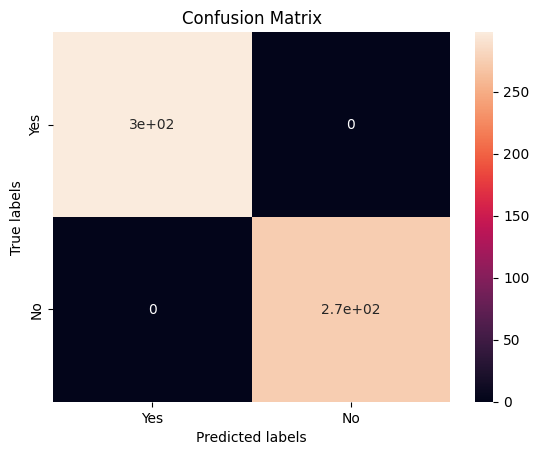

In [787]:
label = ['Yes','No']
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True,ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ROC AUC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate

False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve

In [788]:
# Get the predicted classes
train_class_preds = optimal_rfc.predict(X_train)
test_class_preds = optimal_rfc.predict(X_test)

In [789]:
y_preds_proba_rfc = optimal_rfc.predict_proba(X_test)[::,1]

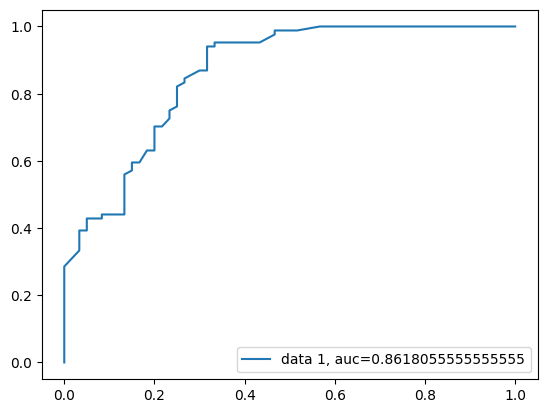

In [790]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rfc
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Implementing XGBoost

In [791]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [792]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [793]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [794]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[15:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



In [795]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(microseconds=77631)

In [796]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest)
len(train_class_preds_probs)

572

In [797]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)
test_class_preds_probs[:20]

array([0.05570496, 0.58381724, 0.07038792, 0.05570496, 0.7268969 ,
       0.8930112 , 0.68544227, 0.90429056, 0.9101179 , 0.3390477 ,
       0.53230345, 0.5385458 , 0.39223275, 0.80763644, 0.7051335 ,
       0.6702033 , 0.11980659, 0.6650915 , 0.9087501 , 0.71704954],
      dtype=float32)

In [798]:
test_class_preds[:20]

[0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]

In [799]:
len(y_train)

572

In [800]:
len(train_class_preds)

572

**Model Evaluation**

In [801]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9300699300699301
The accuracy on test data is  0.7638888888888888


In [802]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7638888888888888
The precision on test data is  0.8095238095238095
The recall on test data is  0.7906976744186046
The f1 on test data is  0.8
The roc_score on train data is  0.7574178027265437


**Confusion Matrix**

In [803]:
# Get the confusion matrix for both train and test
cm_xg = confusion_matrix(y_train, train_class_preds)
print(cm_xg)

[[266  32]
 [  8 266]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

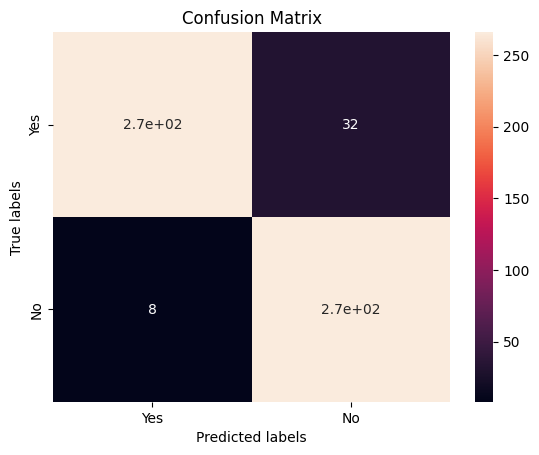

In [804]:
labels = ['Yes', 'No']
ax= plt.subplot()
sns.heatmap(cm_xg, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### Implementing Support Vector Machine

In [805]:
credit_df_svc = Copy_New_df.copy()

In [806]:
#import the packages
from sklearn.model_selection import GridSearchCV 

In [807]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
             'kernel': ['rbf']} 

In [808]:
# define X and y values
X= Copy_New_df.drop(columns=['Loan_Status'])
y= Copy_New_df.Loan_Status

In [809]:
#standardise the x value by using satandardscaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [810]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

### GridSearchCV

In [811]:
from sklearn.svm import SVC

In [812]:
#set the parmeter
#fit the parameter
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [813]:
optimal_SVC_clf = grid_clf.best_estimator_

In [814]:
grid_clf.best_params_


{'C': 1, 'kernel': 'rbf'}

In [815]:
grid_clf.best_score_

0.8042160374758888

In [816]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

### Model Evaluation

In [817]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.8111888111888111
The accuracy on test data is  0.7847222222222222


In [818]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7569444444444444
The precision on test data is  0.8472222222222222
The recall on test data is  0.7176470588235294
The f1 on test data is  0.7770700636942675
The roc_score on test data is  0.7656031904287139


We can see from above results that we are getting around 80% train accuracy and 77% for test accuracy which is not bad. But f1- score is 82% approx, so there might be more ground for improvement.

### Confusion Matrix

[[216  70]
 [ 20 266]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

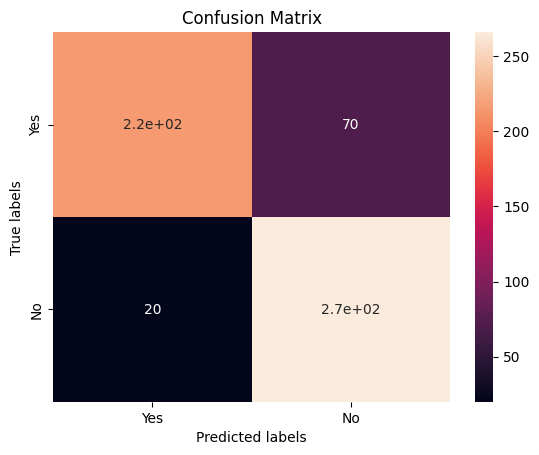

In [819]:
 # Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [820]:
optimal_SVC_clf

SVC(C=1, probability=True)

In [821]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

**ROC AUC curve**

In [822]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

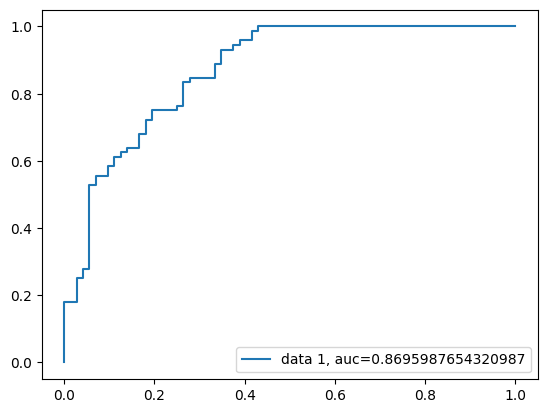

In [823]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Hyperparameter Tuning**


*   Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

*   We can leverage the maximum power of XGBoost by tuning its hyperparameters



In [824]:
#import the packages
from xgboost import  XGBClassifier

In [825]:
#define the X and y value
# define X and y values
X= Copy_New_df.drop(columns=['Loan_Status'])
y= Copy_New_df.Loan_Status
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [826]:
gsearch1.best_score_

0.7975759958071279

In [827]:
optimal_xgb = gsearch1.best_estimator_

In [828]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [829]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.8851774530271399
The accuracy on test data is  0.810126582278481


In [830]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)


The accuracy on test data is  0.810126582278481
The precision on test data is  0.8389830508474576
The recall on test data is  0.792
The f1 on test data is  0.8148148148148148
The roc_score on train data is  0.8111785714285714


**ROC_AUC curve**

In [836]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

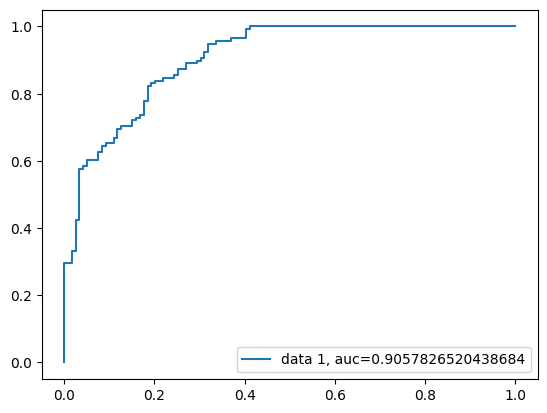

In [837]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Evaluating the models**

In [831]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [832]:
#create a table of all models all score for comparison 

classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rfc, train_accuracy_xgb]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rfc, test_accuracy_xgb]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rfc, test_precision_xgb]
recall_score = [test_recall_lr, test_recall_score_SVC, test_recall_score_rfc, test_recall_score_xgb]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rfc, test_f1_score_xgb]

In [833]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })


,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.811189,0.784722,0.845238,0.797753,0.820809
1,SVC,0.842657,0.756944,0.847222,0.717647,0.777070
2,Random Forest CLf,1.000000,0.784722,0.809524,0.819277,0.814371
3,Xgboost Clf,0.930070,0.763889,0.809524,0.790698,0.800000


From the above table we can find that xgboost classifier perform best among those models

# **Conclusion**

XGBoost model has the highest recall, if the business cares recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric.
Logistic Regression and SVM are giving us the best Recall, F1-score, and ROC Score among other algorithms. We can conclude that these two algorithms are the best to predict whether the approve or not approve according to our analysis.
Random Forest CLf Achieved perfect training accuracy, indicating potential overfitting on training data.Good precision, recall, and F1 score on test data.While the model may generalize well, there is a risk of overfitting.